In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# File names of the four data sets

WHRDataSet_filename = "WHR2018Chapter2OnlineData.csv"








df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


1. **Dataset**  
   World Happiness Report 2018, (`WHR2018Chapter2OnlineData.csv`).

2. **Prediction & Label**  
   I will predict **Generosity** — the residual “extra” generosity measure beyond what log GDP per capita would predict.

3. **Type of Problem**  
   - **Supervised** learning  
   - **Type:** Regression (predicting a continuous score)

4. **Features**  
   - **Economic & material:**  
     - Log GDP per capita  
   - **Social & health:**  
     - Social support  
     - Healthy life expectancy at birth  
     - Freedom to make life choices  
   - **Governance & culture:**  
     - Perceptions of corruption  
     - Confidence in national government  
     - Democratic Quality  
     - Delivery Quality  
   - **Emotional well‑being:**  
     - Positive affect  
     - Negative affect  
   - **(I will encode `country` and `year` as needed.)**

5. **Importance**  
   A model that can predict which countries exhibit above‑expected generosity would help:
   - Philanthropic foundations and NGOs tailor interventions to societies most likely to give.
   - Policymakers identify the social, cultural or governance levers that boost charitable behavior.
   - Researchers understand the interplay of material wealth vs. social and emotional drivers of giving.


In [3]:
# YOUR CODE HERE

display(df.info())
display(df.describe())
display(df.shape)

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

None

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


(1562, 19)

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

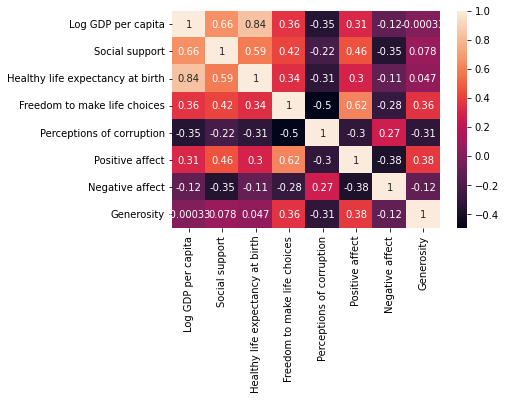

In [4]:

cols = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
        'Freedom to make life choices', 'Perceptions of corruption',
        'Positive affect', 'Negative affect', 'Generosity']

corr = df[cols].corr()
sns.heatmap(corr, annot=True)
plt.show()

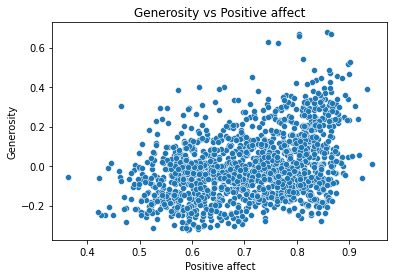

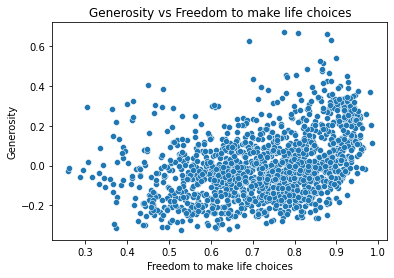

In [5]:
# Scatter plots: Generosity vs top two correlated features
top2 = corr['Generosity'].abs().sort_values(ascending=False).index[1:3]
for feat in top2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feat], y=df['Generosity'])
    plt.title(f'Generosity vs {feat}')
    plt.xlabel(feat)
    plt.ylabel('Generosity')
    plt.show()

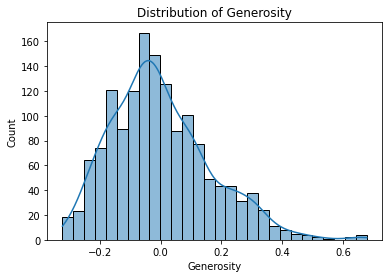

In [6]:
# Distribution of the target: Generosity
plt.figure(figsize=(6,4))
sns.histplot(df['Generosity'], kde=True)
plt.title('Distribution of Generosity')
plt.xlabel('Generosity')
plt.ylabel('Count')
plt.show()

**1. Feature List:**  
After looking at the data, I will keep these features:
- Log GDP per capita
- Social support
- Healthy life expectancy at birth
- Freedom to make life choices
- Perceptions of corruption
- Positive affect
- Negative affect

I will remove columns that have too many missing values (like the World Bank GINI index) and columns that aren't useful for prediction (like country, year, and standard deviation columns).

**2. Data Preparation:**  
- Fill missing values in the features with the mean.
- Drop rows that have missing target values (Generosity).
- Scale the features using StandardScaler so they are on a similar scale.

**3. Model:**  
- I will start with a simple Linear Regression model.
- I will also try a Random Forest Regressor for a more flexible model.

**4. Plan to Train, Analyze, and Improve the Model:**  
- I'll Split the data into training and test sets.
- Train the model on the training set.
- Evaluate performance using R² (coefficient of determination) and Mean Squared Error (MSE) on the test set.
- If performance is not good, I will try tuning the model or selecting different features.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Preparing data
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Perceptions of corruption',
            'Positive affect', 'Negative affect']
target = 'Generosity'

data = df[features + [target]].copy()
data = data.dropna(subset=[target])
data[features] = data[features].fillna(data[features].mean())
data


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Generosity
0,7.168690,0.450662,49.209663,0.718114,0.881686,0.517637,0.258195,0.181819
1,7.333790,0.552308,49.624432,0.678896,0.850035,0.583926,0.237092,0.203614
2,7.386629,0.539075,50.008961,0.600127,0.706766,0.618265,0.275324,0.137630
3,7.415019,0.521104,50.367298,0.495901,0.731109,0.611387,0.267175,0.175329
4,7.517126,0.520637,50.709263,0.530935,0.775620,0.710385,0.267919,0.247159
...,...,...,...,...,...,...,...,...
1557,7.565154,0.799274,48.949745,0.575884,0.830937,0.711885,0.182288,-0.076716
1558,7.562753,0.765839,50.051235,0.642034,0.820217,0.725214,0.239111,-0.045885
1559,7.556052,0.735800,50.925652,0.667193,0.810457,0.715079,0.178861,-0.094585
1560,7.538829,0.768425,51.800068,0.732971,0.723612,0.737636,0.208555,-0.065283


In [10]:
# Train-test split & Scaling
X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=11)


In [14]:
# Explains shich features matter the most when predicting Generosity in this dataset
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print(feature_importance)


Freedom to make life choices        0.244117
Log GDP per capita                  0.186272
Positive affect                     0.155749
Perceptions of corruption           0.120547
Healthy life expectancy at birth    0.118516
Negative affect                     0.092149
Social support                      0.082649
dtype: float64


In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression R2:', r2_score(y_test, y_pred_lr))
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))

Linear Regression R2: 0.26843583483939615
Linear Regression MSE: 0.018908023050306096


In [12]:
# Random Forest
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest R2:', r2_score(y_test, y_pred_rf))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))

Random Forest R2: 0.6127431448823634
Random Forest MSE: 0.010009048955187451


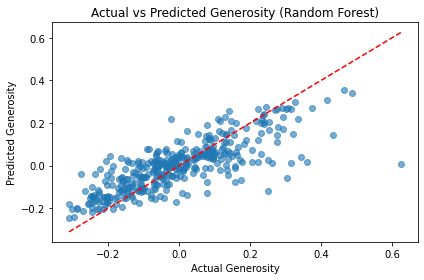

In [15]:
# Comparing outputs
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel('Actual Generosity')
plt.ylabel('Predicted Generosity')
plt.title('Actual vs Predicted Generosity (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


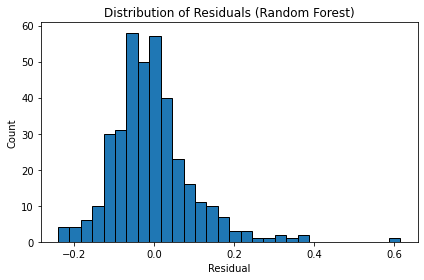

In [16]:
#Checking residual
residuals = y_test - y_pred_rf
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [19]:
# Gridsearch for finding better parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = RandomForestRegressor(random_state=0)
grid = GridSearchCV(rf_grid, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Best cross-val R2:', grid.best_score_)

# Evaluate best model on test data
y_pred_best = grid.predict(X_test)
print('Test R2:', r2_score(y_test, y_pred_best))
print('Test MSE:', mean_squared_error(y_test, y_pred_best))


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-val R2: 0.503818512812722
Test R2: 0.609650776058966
Test MSE: 0.010088974385897972


In this project, I tried to predict the Generosity score from the World Happiness Report dataset using different machine learning models. First, I explored the data and chose features that seemed most relevant for the prediction. I started with Linear Regression, but the R^2 score was only about 0.27, which was pretty low. When I tried Random Forest, the performance improved a lot and I was able to get an R^2 of around 0.61. I tuned the Random Forest with GridSearchCV and also tried using only the top important features, but removing features actually made the results worse. Through this process, I learned that predicting generosity is quite challenging and the features in this dataset can only explain so much. In the end, Random Forest with the main set of features gave the best results for this problem.
